In [9]:
using Plots
using LinearAlgebra
using FastGaussQuadrature
using QuadGK
using LaTeXStrings

次の関数を$[0, 1]$で積分

In [10]:
f(x) = x^3 * exp(x)*sin(x) 
analysis = 0.5 * (ℯ*sin(1.0) - ℯ * cos(1))

0.40933067363147857

## 長方形求積

In [11]:
error = Array{Float64}(undef, 999)
for n in 2:1000
    xs = range(0.0, 1.0, length = n)
    S = 0.0
    for i in xs
        S += f(i)/n
    end
    error[n-1] = abs(S - (analysis))
end

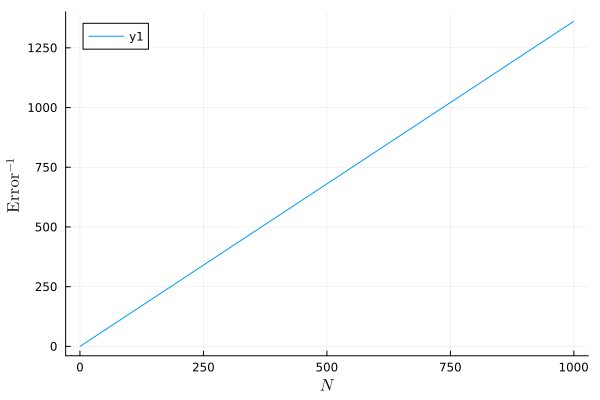

In [12]:
plot(1 ./ error, 
    #yaxis = :log,
    ylabel = L"\mathrm{Error^{-1}}",
    xlabel = L"N"
    )

## Gauss求積

In [13]:
a = 0.0
b = 1.0
deg = 10

function quad_rule(x, w, a, b)
    @assert b > a
    x_adjusted = (b - a) * 0.5 * (x .+ 1) .+ a
    w_adjusted = (0.5 * (b - a)) .* w
    return x_adjusted, w_adjusted
end

quad_rule (generic function with 1 method)

In [14]:
res = Array{Float64}(undef, 30)
error_GL = Array{Float64}(undef, 30)

for deg in 1:30
    x, w = gausslegendre(deg)
    new_x, new_w = quad_rule(x, w, a, b)
    res[deg] = dot(f.(new_x), new_w)
    error_GL[deg] = abs(res[deg]-(analysis))/(analysis)
end

In [17]:
error_GL

30-element Vector{Float64}:
 0.7586184183923237
 0.061583747331958226
 6.92178905758422e-5
 5.5223015619674265e-6
 1.4522754040021104e-9
 2.6069842414370696e-11
 3.2547466275386724e-15
 1.6273733137693362e-15
 0.0
 5.424577712564454e-16
 ⋮
 1.4917588709552248e-15
 1.3561444281411136e-16
 6.780722140705568e-16
 2.712288856282227e-16
 1.3561444281411136e-16
 1.4917588709552248e-15
 2.712288856282227e-16
 4.0684332844233405e-16
 5.424577712564454e-16

In [25]:
N = collect(1:100)

plot(N, error_GL)

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
